# Installing required modules for the given task

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib 

You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [41]:
!pip install -U scikit-learn pandas tensorflow_hub

Requirement already up-to-date: scikit-learn in d:\notebooks\week2\catvsdog\lib\site-packages (1.1.1)
Requirement already up-to-date: pandas in d:\notebooks\week2\catvsdog\lib\site-packages (1.4.3)


You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [40]:
!pip install tensorflow_datasets 

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=6b7d7e1540370ce661a826ca6a81aad4e689b7c9b4bcb1fcb2ebd09047a7a821
  Stored in directory: c:\users\vincent\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise


You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [41]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.0.0
certifi                      2021.10.8
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
dill                         0.3.5.1
entrypoints                  0.4
etils                        0.6.0
executing                    0.8.3
flatbuffers                  2.0
fonttools                    4.33.3
gast                         0.5.3
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
googleapis-common-protos     1.56.3
grpcio                       1.46.0
h5py                         3.6.0
idna                         3.3
importlib-metadata           4.11.

You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Removing Dodgy Images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'cats_and_dogs'

In [6]:
image_exts = ['jpeg','jpg']

# Data Preparation

In [7]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('cats_and_dogs')

Found 23491 files belonging to 2 classes.


**You can find the data at https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset**

In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

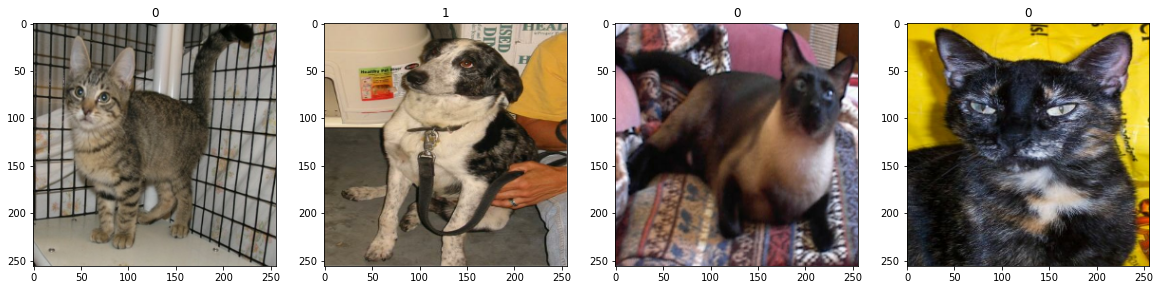

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    ax[idx].title.set_text(batch[1][idx])

**1 - dog while 0 - cat**

# Scaling the data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.2146403 , 0.13620892, 0.04209128],
          [0.21132286, 0.13289149, 0.03877384],
          [0.20686275, 0.12843138, 0.03431373],
          ...,
          [0.23370577, 0.15527439, 0.04939204],
          [0.230834  , 0.15240262, 0.04652028],
          [0.23411697, 0.14981857, 0.05273677]],
 
         [[0.22052456, 0.1420932 , 0.04797555],
          [0.21868154, 0.14025018, 0.04613252],
          [0.21645652, 0.13802513, 0.04390749],
          ...,
          [0.23087901, 0.15244763, 0.04656528],
          [0.23747702, 0.15904565, 0.0531633 ],
          [0.22284007, 0.13854167, 0.04145987]],
 
         [[0.23258272, 0.15415135, 0.0600337 ],
          [0.21967582, 0.14124444, 0.0471268 ],
          [0.20873114, 0.13029976, 0.03618212],
          ...,
          [0.23401454, 0.15558316, 0.04970081],
          [0.23139553, 0.15296416, 0.0470818 ],
          [0.22604789, 0.14174949, 0.04521772]],
 
         ...,
 
         [[0.2527832 , 0.327293  , 0.35082242],
          [0.22791

# Splitting the data

In [12]:
len(data)

735

In [13]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)

In [14]:
test_size+train_size

735

In [15]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [35]:
import tensorflow_datasets as tfds
x_test = np.concatenate([x for x, y in tfds.as_numpy(test)], axis=0)

In [16]:
# getting the labels for evaluation
import tensorflow_datasets as tfds
y_test = np.concatenate([y for x, y in tfds.as_numpy(test)], axis=0)

D:\Notebooks\Week2\catvsdog\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Building the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [18]:
# This model has the given configurations as the model included in gclassroom
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))


model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [21]:
history1 = model1.fit(train,
                    epochs=10,
                    batch_size=25,
                    validation_data=test)

Epoch 1/10
588/588 [==============================] - 66s 113ms/step - loss: 0.6838 - acc: 0.5915 - val_loss: 0.5980 - val_acc: 0.6680
Epoch 2/10
588/588 [==============================] - 64s 109ms/step - loss: 0.5653 - acc: 0.7097 - val_loss: 0.5205 - val_acc: 0.7429
Epoch 3/10
588/588 [==============================] - 64s 109ms/step - loss: 0.4145 - acc: 0.8088 - val_loss: 0.6815 - val_acc: 0.7202
Epoch 4/10
588/588 [==============================] - 64s 109ms/step - loss: 0.2252 - acc: 0.9059 - val_loss: 0.7392 - val_acc: 0.7448
Epoch 5/10
588/588 [==============================] - 64s 109ms/step - loss: 0.1033 - acc: 0.9624 - val_loss: 0.8556 - val_acc: 0.7337
Epoch 6/10
588/588 [==============================] - 65s 110ms/step - loss: 0.0599 - acc: 0.9808 - val_loss: 1.2077 - val_acc: 0.7497
Epoch 7/10
588/588 [==============================] - 65s 111ms/step - loss: 0.0408 - acc: 0.9871 - val_loss: 1.3031 - val_acc: 0.7412
Epoch 8/10
588/588 [==============================] - 6

# Plotting the performance of the model

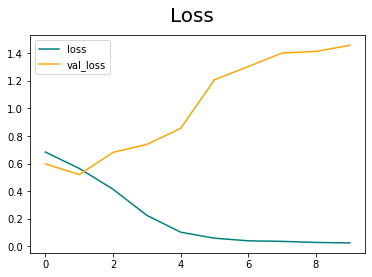

In [22]:
fig = plt.figure()
plt.plot(history1.history['loss'], color='teal', label='loss')
plt.plot(history1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

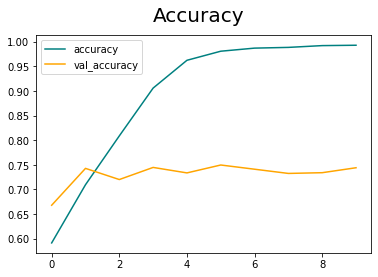

In [23]:
fig = plt.figure()
plt.plot(history1.history['acc'], color='teal', label='accuracy')
plt.plot(history1.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Even though the accuracy is almost perfect, there is a huge gap between the validation of both loss and accuracy. This is a great sign of overfitting**

**There are three ways to fix overfitting which are: <br>
• Data Augmentation - Increase the amount of the data, collect new data or derive new data from existing data / data augmentation. <br>
• Dropout - Reduce the complex of the model. For example, reduce the hidden layers or number of units in the hidden layer. <br>
• Regularization - Put constraints in the coefficients/parameters. For example, L1 or L2 regularization.<br>
In this project, we will explore one of them (Data Augmentation)**

# Another Model

# Model 2 (Image Augmentation)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [77]:
dataGen= keras.preprocessing.image.ImageDataGenerator(
        rotation_range=50,
        zoom_range=0.15,
        horizontal_flip=True,
       
)

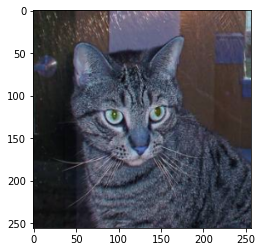

In [78]:
# Original Image
im2 = cv2.imread('sample.jpg')
resized_img = tf.image.resize(im2,(256,256))
plt.imshow(resized_img.numpy().astype(int))
img_sample = np.expand_dims(resized_img,0)
plt.show()

In [81]:
X = img_sample
I=0
for Batch in dataGen.flow(X.astype(object), save_to_dir="D:\img_samples", save_prefix="Data Augmentation", save_format="Png"):
    I+=1
    if I>8:
        break

In [25]:
model2 = models.Sequential([
data_augmentation,
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)       

# Training the second model

In [27]:
history2 = model2.fit(train,
                    epochs=15,
                    batch_size=25,
                    validation_data=test)

Epoch 1/15
588/588 [==============================] - 71s 120ms/step - loss: 0.6761 - acc: 0.6038 - val_loss: 0.6596 - val_acc: 0.6252
Epoch 2/15
588/588 [==============================] - 69s 117ms/step - loss: 0.6346 - acc: 0.6448 - val_loss: 0.6139 - val_acc: 0.6648
Epoch 3/15
588/588 [==============================] - 69s 117ms/step - loss: 0.5955 - acc: 0.6842 - val_loss: 0.5554 - val_acc: 0.7136
Epoch 4/15
588/588 [==============================] - 69s 117ms/step - loss: 0.5489 - acc: 0.7216 - val_loss: 0.5099 - val_acc: 0.7499
Epoch 5/15
588/588 [==============================] - 69s 117ms/step - loss: 0.5114 - acc: 0.7486 - val_loss: 0.4901 - val_acc: 0.7621
Epoch 6/15
588/588 [==============================] - 68s 116ms/step - loss: 0.4872 - acc: 0.7651 - val_loss: 0.4516 - val_acc: 0.7887
Epoch 7/15
588/588 [==============================] - 68s 115ms/step - loss: 0.4673 - acc: 0.7769 - val_loss: 0.4659 - val_acc: 0.7872
Epoch 8/15
588/588 [==============================] - 6

# Model 2 performance

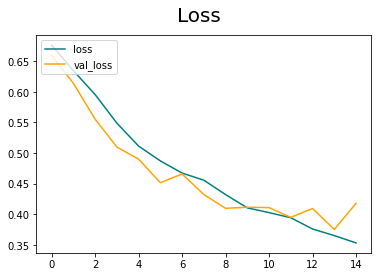

In [28]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

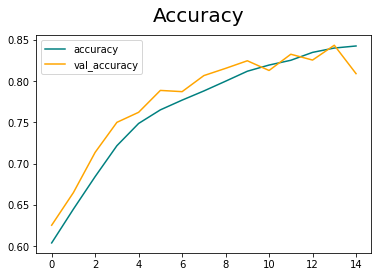

In [29]:
fig = plt.figure()
plt.plot(history2.history['acc'], color='teal', label='accuracy')
plt.plot(history2.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Image Augmentation solves the overfitting problem from Model 1**

# Model 3

In [82]:
data = tf.keras.utils.image_dataset_from_directory('cats_and_dogs',image_size=(224, 224))
data = data.map(lambda x,y: (x/255, y))
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

Found 23491 files belonging to 2 classes.


In [83]:
# getting the labels for evaluation
y_test = np.concatenate([y for x, y in tfds.as_numpy(test)], axis=0)

In [84]:
import tensorflow_hub as hub
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [85]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [87]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  layers.Dense(1, activation='sigmoid')
])

model3.compile(
  optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [88]:
history3 = model3.fit(train,
                    epochs=5,
                    batch_size=25,
                    validation_data=test)

Epoch 1/5
588/588 [==============================] - 56s 86ms/step - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0425 - val_acc: 0.9857
Epoch 2/5
588/588 [==============================] - 51s 86ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0365 - val_acc: 0.9880
Epoch 3/5
588/588 [==============================] - 51s 87ms/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0367 - val_acc: 0.9876
Epoch 4/5
588/588 [==============================] - 50s 85ms/step - loss: 0.0210 - acc: 0.9937 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 5/5
588/588 [==============================] - 49s 83ms/step - loss: 0.0192 - acc: 0.9945 - val_loss: 0.0354 - val_acc: 0.9878


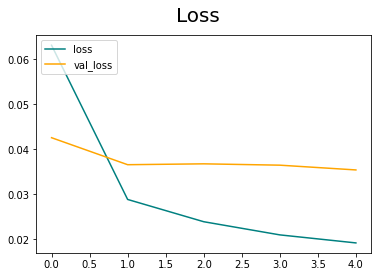

In [89]:
fig = plt.figure()
plt.plot(history3.history['loss'], color='teal', label='loss')
plt.plot(history3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

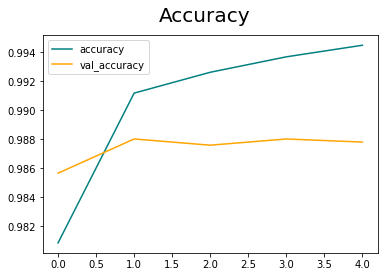

In [105]:
fig = plt.figure()
plt.plot(history3.history['acc'], color='teal', label='accuracy')
plt.plot(history3.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testing Images

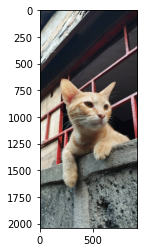

In [105]:
im2 = cv2.imread('liit.jpg')
plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show()


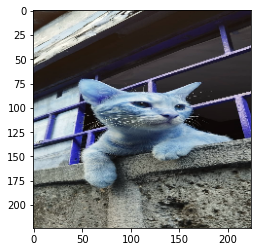

In [106]:
resize = tf.image.resize(im2,(224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
yhat = model3.predict(np.expand_dims(resize/255, 0))

In [108]:
yhat 

array([[0.06339129]], dtype=float32)

In [109]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


# Saving The Model

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model1.save(os.path.join('models','CNN_catanddogclassifier.h5'))

In [40]:
model2.save(os.path.join('models','augment_catanddogclassifier.h5'))

In [100]:
model3.save(os.path.join('models','TL_catanddogclassifier.h5'))

In [16]:
cat_dog_classifier = load_model(os.path.join('models','TL_catanddogclassifier.h5'))